# Why/Motivation: 

1. I was really intrigued by the recent development of Anthropic's chatbot, Claude, a supposedly more ethical chatbot compared to openAI's, chatGPT. I really wanted to test its capabilities of being more "ethical" to see if it was measuring up to its value proposition.

2. I wanted to do sentiment analysis of responses across the world wide web to see which chatbot is most trusted.

3. [x] Good for me to get updated on NLP techniques.

4. Fun to see how the world thinks of chatGPT/Claude and what they think of themselves. (turning Q & A on themselves. self-introspection)

5. [x] Wanted to see if can do sentiment analysis across multiple emotions to not have such a Black and White assessment of statements since feelings/people's positions are usually not polar, but spead across a variety of feelings.

6. Not just explore Twitter (X) and Reddit, but also pop songs for real-time relevant responses.

7. Look at fresh time series data.

8. [x] Explore a different viz py lib: d3.js to build more sophisticated, interactive viz for web portfolio - not realistic since d3.js has steep learning curve before getting easy and usually just for NYT publications, not stakeholders who need quick answers to make fast decisions~~

# Business Recommendation:

Thought this would be a nice twist on sentiment analysis on product launches. This is something I was looking to do since coming from product analytics, experimentation looked at event signals versus what people were actually saying about the product. People say that actions are louder than words, but words also speak volumes. Would have been nice to have complemented by experimentation resuslts with some sort of sentiment analysis. Would have added more weight, been more comprehensive assessment of new feature launches.

# 1. Define metrics of success (its value prop, for business) for helpful chatbot

Doing sentiment analysis, so metric of success is if customers are happy (positive sentiment) with the product.

* After getting some user responses/opinions, this helps us understand the data.

* And when we understand the data, we can better utilize it to measure against our metrics of success for or GenAI chatbot battle.

*Metrics that are different from social media opinion because it is through the lens of developers/business. 

*Scraping social media helps inform product success as well, but measurement is pure sentiment. Analyzing cause for sentiment is key for product feature validation or product feature exploration. And the cause is sought from text/comments. 

*Sentiment analysis supplements new product evaluation by giving users' a 'voice'.

# Metrics of Success (Product (fulfill intended purpose) vs Business (objectives), Leading (engage users effectively)/Lagging, Composite); categories: user, conversational, commercial

1. How precise is the answer/is it relevant?
2. What is the quality of the answer (thoroughness and depth)?

Other:
Ref: https://www.youtube.com/watch?v=xjEu9t1nJag
1. Tokens (prompt size limit)
2. Image Recognition
3. Image Creation
4. Web Access
5. Supported Languages
6. Voice Chat
7. Analyze PDF's
8. Math ability
9. Long Text Summarization
10. Availability

Llama Paper:
1. Commonsense Reasoning
2. World Knowledge
3. Reading Comprehension
4. Math
5. MMLU (5 Shot)?
6. BBH (BigBench Hard)?
7. AGI Eval (3-5 Shot)

Overall Best Metrics from Asking all Metrics Measuring Performance On:

* Perplexity
* BLEU Score (Bilingual Evaluation Understudy Score) - similarity between ref and generated txt
* ROUGE (Recall-Oriented Understudy for Gisting Evaluation) - how accurate are summaries
* Human Evaluation
* Engagement Metrics (conversion rate/win rate, average conversion duration, # msg's exchanged, user satisfaction, volume of active user sessions, bounce rate, satisfaction rate, retention rate)
* Diversity and Novelty
* Context Coherence

* Appropriateness
* Sentiment Accuracy
* Question Answering Accuracy/Task Accuracy Rate/NLP Accuracy/Comprehension Capabilities
* Dialog Breakdown Rate/Error Rate/Fallback Rate
* Human Likeness/Response Generation Fluency
* Task Success Rate/Task Completion Rate/Average Cycle Length/Goal Completion Rate/Self-Service Rate
* Efficiency/Average Resolution Time

* Cost Savings
* Brand Perception
* Sales Revenue
* Personalization
* Adaptability
* Scalability
* Average Contract Value
* Questions Per Conversation/ AI chatbot interaction rate
* Chatbot usage distribution per hour
* Conversation starter messages 

* Total users

Due to content being analyzed is users' opinions, then metric of interest will be: 

* Brand Perception
* User Satisfaction 

Both are vital to get a pulse on overall user sentiment of company as well as immediate sentiment after new product feature release.

# 2. Scrape:
* ~Twitter~ have to pay for scrape; no bueno
* Reddit (1000 cap)
* Threads
* BlueSky
* Mastodon (spam, search sucks)?
* Substack/Substack Notes
* Medium
* [x] YouTube
* LinkedIn
* Song Lyrics

to get info on following chatbots to do analysis on:
* chatGPT (OpenAI)
* Claude (Anthropic)
* Bard (Google)
* Bing Chat (Microsoft, images, voice chat)
* Perplexity AI (advancing how people discover and share information)
* Pi (empathetic/human emotions)

# 3. [x] Visualizations on User Emotions

# 4. Other NLP-related analyses (e.g. Topic Modeling)

In [1]:
! pip3 install -U nltk[twitter] --quiet
! pip install -q transformers --quiet
! pip install plotly==5.18.0 --quiet
! pip install cufflinks --upgrade --quiet

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
preprocessing 0.1.13 requires nltk==3.2.4, but you have nltk 3.8.1 which is incompatible.


In [2]:
import json

# API's
import googleapiclient.discovery
import googleapiclient.errors

import numpy as np
import pandas as pd
pd.set_option('display.max_colwidth', None)

# Sentiment Scores
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from transformers import pipeline
from textblob import TextBlob
# from google.cloud import language

# Text Parsing
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer

# Visualizations
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

In [3]:
credentials = json.load(open('/kaggle/input/credentials/credentials.json'))

In [4]:
# YouTube Video ID's

# chatGPT: "2AdkSYWB6LY"
# Claude: "yoP7XAw3gYg"
# Bard: "3wySA9DbaOw"
# Bing Chat: "qkQoX8P4jUw"
# Perplexity AI: ""
# Pi: "l-QHJXMnwcA"

## Scraping YouTube 
All Comments per video (Top level only: no replies to comments)

In [5]:
# Ref: https://github.com/analyticswithadam/Python/blob/main/YouTube_Comments_Advanced.ipynb

api_service_name = "youtube"
api_version = "v3"
DEVELOPER_KEY = credentials["youtube_api_key"]

youtube = googleapiclient.discovery.build(
    api_service_name, api_version, developerKey=DEVELOPER_KEY)

In [6]:
def getcomments(video):
    request = youtube.commentThreads().list(
        part="snippet",
        videoId=video,
        maxResults=100
    )

    comments = []

    response = request.execute()

    for item in response['items']:
        comment = item['snippet']['topLevelComment']['snippet']
        comments.append([
            comment['authorDisplayName'],
            comment['publishedAt'],
            comment['likeCount'],
            comment['textOriginal'],
            comment['videoId']
        ])

    while (1 == 1):
        try:
            nextPageToken = response['nextPageToken']
        except KeyError:
            break
        nextPageToken = response['nextPageToken']
        # Create a new request object with the next page token.
        nextRequest = youtube.commentThreads().list(part="snippet", videoId=video, maxResults=100, pageToken=nextPageToken)
        # Execute the next request.
        response = nextRequest.execute()
        # Get the comments from the next response.
        for item in response['items']:
            comment = item['snippet']['topLevelComment']['snippet']
            comments.append([
                comment['authorDisplayName'],
                comment['publishedAt'],
                comment['likeCount'],
                comment['textOriginal'],
                comment['videoId']
            ])

    df = pd.DataFrame(comments, columns=['author', 'published_at', 'like_count', 'text', 'video_id'])
    return df

In [7]:
# Get all chatbot comments from YouTube

# vids = [chatGPT, Claude, Bard, Bing Chat, Pi]
vids = ["2AdkSYWB6LY", "yoP7XAw3gYg", "3wySA9DbaOw", "qkQoX8P4jUw", "l-QHJXMnwcA"]

df = pd.DataFrame()
vids_df = []
for v in vids:
    df2 = getcomments(v)
    vids_df.append(df2)
    df = pd.concat([df, df2]) # Combine all df's together into one big dataframe

df.sample(5)

,author,published_at,like_count,text,video_id
178,@MaxGrossenbacher,2023-05-06T17:16:07Z,3,Wouldn’t say it outperforms OpenAI. It has its own strengths. But in many tasks it lags behind GPT4.,l-QHJXMnwcA
446,@alfonsojarago,2023-03-15T00:40:40Z,1,I just got home from watching Scream 6 and this video is far more scarier.,2AdkSYWB6LY
10,@506869269117rupesh,2023-10-08T11:18:29Z,0,"Bard is easy simple user friendly, I have always struggled with chatGPT.",3wySA9DbaOw
32,@brandonfuller246,2023-09-25T18:03:29Z,1,Excellent update! This is directly accessible and impactful for professionals across the world. Thanks!,3wySA9DbaOw
270,@Dre-Eye,2023-03-15T16:41:07Z,3,"You definitely gained a subscriber with this video. Great info, I look forward to more",2AdkSYWB6LY


In [8]:
df['video_id'].value_counts()

video_id
2AdkSYWB6LY    597
l-QHJXMnwcA    203
3wySA9DbaOw     88
yoP7XAw3gYg     52
qkQoX8P4jUw     48
Name: count, dtype: int64

In [9]:
vids_df[0].sort_values(by='like_count', ascending=False)[0:10]

,author,published_at,like_count,text,video_id
570,@Viperzka,2023-03-14T21:46:59Z,705,"I just love how ""it tried to break free into the Internet"" is a footnote. We are in for a wild ride.",2AdkSYWB6LY
568,@EnesKaraboga,2023-03-14T21:49:40Z,556,Thank you so much for this. Almost all channels went crazy and only pumping out cool stuff you can do with GPT-4 but you are the one actually looked into the research and come up with something original.,2AdkSYWB6LY
367,@Paul-rs4gd,2023-03-15T04:38:45Z,403,Great to see somebody reading the paper rather than regurgitating examples. Thanks.,2AdkSYWB6LY
563,@fynnjackson2298,2023-03-14T21:56:03Z,307,"This year just keeps getting more and more interesting, and we all know there is no slowing down, on the contrary, most likely will just keep speeding up.",2AdkSYWB6LY
538,@TheAIWizard,2023-03-14T22:22:49Z,299,70% human preference for GPT 4 is still pretty impressive. Considering how good GPT 3.5 already was much of that is going to be down to human woolyness rather than GPT 4 not actually beeing better. An interesting result though.,2AdkSYWB6LY
528,@godfistleesin1971,2023-03-14T22:33:24Z,207,"AI Explained is an actual Gigachad for reading the entire tech report and making a vid this fast and early whilst still giving out quality content and I think that no matter what or how scary good AI will become our appreciation for human effort is always gonna be present with us AI will act as nothing more than a tool for us and I'm not being naïve about it's potential since i highly doubt humans would ever relinquish control over to robots we built. we will be making sure that scenario stays as nothing more than Hollywood fantasy .\n.\n.\n.\n(chatGPT's version in the style of an Englishman from the 1800's )\n.\nVerily, I must commend thee, dear AI Explained , for thine astute and expedient perusal of the technical document and production of high-quality content withal. 'Tis certain that, regardless of the awe-inspiring capabilities of artificial intelligence, mankind shall ever hold in high regard the labours of their fellow men. Indeed, AI shall remain naught but a tool in our hands, for it is doubtful that we shall ever cede control to the automata we have wrought. Mayhap there be those who espouse such a notion, but I do believe such a scenario shall remain but a fantastical notion, best left to the purview of Hollywood.\n(it sounds so posh and haughty i love it)",2AdkSYWB6LY
581,@ricardochvs23,2023-03-14T21:30:47Z,160,OpenAI thinks an open AI would be too dangerous 🤔,2AdkSYWB6LY
239,@mediacenter3174,2023-03-15T23:45:24Z,125,"This feels like a dream, I cant believe we have access to this level of AI in our lifetime.",2AdkSYWB6LY
191,@Estrav.Krastvich,2023-03-17T07:57:06Z,100,That day has finally come.\nTechnical reports are now more fascinating than science fiction.,2AdkSYWB6LY
525,@squidwardfromua,2023-03-14T22:38:56Z,64,"Ladies and gentlemen, welcome to an AI era. Lots of people thought there will be quantum era after informational, but seems like progress decided to make a quick turn to make a little touch to AI. Now imagine what capabilities AI would have in a century, with quantum computing.",2AdkSYWB6LY


In [10]:
# Rename video id's to appropriate chat bot
df['video_id'] = df['video_id'].map({'2AdkSYWB6LY' : 'ChatGPT', 'yoP7XAw3gYg' : 'Claude', '3wySA9DbaOw' : 'Bard', 'qkQoX8P4jUw' : 'Bing Chat', 'l-QHJXMnwcA' : 'Pi'})
df.rename(columns = {'video_id':'chatbot'}, inplace=True)
df.sample(5)

,author,published_at,like_count,text,chatbot
498,@mandarsantan,2023-03-14T23:04:47Z,0,"GPT-4 has been released and its technical report is 98 pages long.\nThe model is used by Bing and has a doubled context length from chat GPT.\nThe report does not disclose details about the model's size, parameter count, hardware, or training method due to competitive and safety concerns.\nGPT-4 scored in the top 10% of test takers for the bar exam but other exam scores did not improve as much.\nThe model exhibits new abilities, such as exhibiting long-term power-seeking behavior and understanding hindsight neglect.\nGPT-4 performs better than previous models in multiple languages and image-to-text tasks.\nThe model may generate undesirable content, including propaganda and disinformation.\nThe report raises concerns about the emergent behavior of GPT-4 and its potential risks.\nCompanies such as Morgan Stanley, the Khan Academy, and the government of Iceland are already using GPT-4.\nThe safety page on OpenAI's promotional website is missing.",ChatGPT
38,@MegaMijit,2023-09-24T14:31:21Z,0,"just used bard for a few days. its definitely catching up, but bard still SUCKS in a lot of ways AND it cant even generate images...",Bard
125,@NaderTaghinia,2023-03-19T05:14:13Z,1,"Thank you for the time and effort you put into this very useful video. On 05:13 , could it also mean that 30 percent of people found the responses equally favorable?",ChatGPT
222,@sqwert654,2023-03-16T12:30:55Z,3,I see it as a fantastic tool as a coder for 45 years. I hope to write the games in my mind quicker and better with this.,ChatGPT
209,@Damian-el1sw,2023-03-16T19:49:23Z,1,Welcome to the End of the world ladies and gentlemens,ChatGPT


## Scraping Reddit ??

In [11]:
# Peak at the data pull
df.head(10)

,author,published_at,like_count,text,chatbot
0,@ozramblue117,2023-07-15T06:52:27Z,0,"What scares me is that if this is what’s publicly available, what have the military got and where’s it at now? 😅",ChatGPT
1,@lenkaa.9955,2023-06-25T09:33:43Z,0,"I am sorry I am confussed, does gpt has access to internet or not. I am getting different answers. Which tool is acctually scraping internet?",ChatGPT
2,@decoyuser1506,2023-05-18T13:06:00Z,2,"5:45 iam a Telugu Guy! , and yes when the data used by chatgpt to get trained is mostly english , and yeah most english phrases in telugu sucks , english doesn't actually incorporate the rules of telugu",ChatGPT
3,@ABRARAHMAD-ul8gu,2023-05-16T17:44:42Z,0,Please provide a Link to download gtp 4,ChatGPT
4,@RosscoAW,2023-05-09T23:07:20Z,0,"Lmao ofc GPT-4 is going to be good at generating disinfo; the alignment research focuses on making AI harmless and unthreatening, so you barely have to nudge it at all for it to give you middle of the road, unthreatening, moderate, conservative, libbed up responses praising autocrats -- those are the only responses it's supposed to give for basically everything. The alignment process hasn't been done according to critical theory or anything else that can actually comprehensively understand situations of power and how to respond to them ethically, it's just been designed to make the responses do as much virtue signaling as possible. If the AI's top priority is virtue signaling, then that's an *excellent* tool for autocrats as well as corporate copywriting. Hence why GPT-4 has helped ramp up corporate greenwashing attempts the past few weeks, lmao.\n\nAnd, yeah, not remotely stunned at all by the power seeking. Again, the model isn't aligned to actually *understand power at all.* That's the area of critical theory (power structures etc). You can't discourage power-seeking unless the alignment process understands power conceptually at it's core, and a comprehensive and cogent theoretical framework for responding to the realities of power in relation to desired ethical consequences. It's not surprising either they didn't have a safety page out when they published GPT-4: as far as they understand, they're just throwing shots in the dark when it comes to alignment and safety, because that's the general opinion of most AI researchers without any social sciences background (gee golly I wonder if there's an entire branch of science dedicated to understanding morality, ethics, values, and humanity ohhh gosh I dunno hyuck I guess we'll just have to re-invent a bunch of wheels ha huh)\n\nFrankly, GPT-4 understands social sciences a helluva lot better than alignment researchers do, they'd be better served just getting GPT-4 to teach them enough about value systems and worldviews, maybe filtering it through some framework STEM ppl will go hard for like integral theory lol, before they try to align their next LLM lol.",ChatGPT
5,@danielrodio9,2023-04-22T11:20:30Z,0,"If we train children in primary school on the basis of punishment and reward, it does not lead to intrinsic motivation. Instead, punishment and reward lead students to seek out more reward instead of seeking out the learning that is the goal. Behaviorism is not the right way to go if the goal is learning as well as formation.",ChatGPT
6,@charlesguest6587,2023-04-17T01:25:21Z,2,"Looking at the chart with all the exams (3:05), I feel like the real takeaway should be that GPT-4 scored 80%+ on most of them, and there were only a few that showed no progress between 3.5 and 4. In my opinion they were absolutely right to highlight the bar exam stat as it is the most advanced exam on the list and showed the greatest improvement between the two models by far. Really do love your videos, thank you!",ChatGPT
7,@PersonianOld,2023-04-16T19:22:24Z,1,"AI is becoming unpredictable, even for the programers.\n\nI don't know if this is a good thing or a bad thing-",ChatGPT
8,@Matthew_with_VPS_Hosting,2023-04-16T13:31:55Z,1,"You have a r

# Add sentiment
## Candidates:
* Vader
* Happy Transformer
* TextBlob
* Google NL API

In [12]:
# Vader

df_vader = df.copy()
analyzer = SentimentIntensityAnalyzer()
df_vader['rating'] = df_vader['text'].apply(analyzer.polarity_scores)

# Docs on how scoring was derived and what it means: https://github.com/cjhutto/vaderSentiment#about-the-scoring
df_vader['compound'] = [analyzer.polarity_scores(x)['compound'] for x in df_vader['text']]
df_vader['neg'] = [analyzer.polarity_scores(x)['neg'] for x in df_vader['text']]
df_vader['neu'] = [analyzer.polarity_scores(x)['neu'] for x in df_vader['text']]
df_vader['pos'] = [analyzer.polarity_scores(x)['pos'] for x in df_vader['text']]

In [13]:
df_vader.head(10)

,author,published_at,like_count,text,chatbot,rating,compound,neg,neu,pos
0,@ozramblue117,2023-07-15T06:52:27Z,0,"What scares me is that if this is what’s publicly available, what have the military got and where’s it at now? 😅",ChatGPT,"{'neg': 0.107, 'neu': 0.893, 'pos': 0.0, 'compound': -0.34}",-0.3400,0.107,0.893,0.000
1,@lenkaa.9955,2023-06-25T09:33:43Z,0,"I am sorry I am confussed, does gpt has access to internet or not. I am getting different answers. Which tool is acctually scraping internet?",ChatGPT,"{'neg': 0.058, 'neu': 0.942, 'pos': 0.0, 'compound': -0.0772}",-0.0772,0.058,0.942,0.000
2,@decoyuser1506,2023-05-18T13:06:00Z,2,"5:45 iam a Telugu Guy! , and yes when the data used by chatgpt to get trained is mostly english , and yeah most english phrases in telugu sucks , english doesn't actually incorporate the rules of telugu",ChatGPT,"{'neg': 0.065, 'neu': 0.801, 'pos': 0.134, 'compound': 0.4003}",0.4003,0.065,0.801,0.134
3,@ABRARAHMAD-ul8gu,2023-05-16T17:44:42Z,0,Please provide a Link to download gtp 4,ChatGPT,"{'neg': 0.0, 'neu': 0.685, 'pos': 0.315, 'compound': 0.3182}",0.3182,0.000,0.685,0.315
4,@RosscoAW,2023-05-09T23:07:20Z,0,"Lmao ofc GPT-4 is going to be good at generating disinfo; the alignment research focuses on making AI harmless and unthreatening, so you barely have to nudge it at all for it to give you middle of the road, unthreatening, moderate, conservative, libbed up responses praising autocrats -- those are the only responses it's supposed to give for basically everything. The alignment process hasn't been done according to critical theory or anything else that can actually comprehensively understand situations of power and how to respond to them ethically, it's just been designed to make the responses do as much virtue signaling as possible. If the AI's top priority is virtue signaling, then that's an *excellent* tool for autocrats as well as corporate copywriting. Hence why GPT-4 has helped ramp up corporate greenwashing attempts the past few weeks, lmao.\n\nAnd, yeah, not remotely stunned at all by the power seeking. Again, the model isn't aligned to actually *understand power at all.* That's the area of critical theory (power structures etc). You can't discourage power-seeking unless the alignment process understands power conceptually at it's core, and a comprehensive and cogent theoretical framework for responding to the realities of power in relation to desired ethical consequences. It's not surprising either they didn't have a safety page out when they published GPT-4: as far as they understand, they're just throwing shots in the dark when it comes to alignment and safety, because that's the general opinion of most AI researchers without any social sciences background (gee golly I wonder if there's an entire branch of science dedicated to understanding morality, ethics, values, and humanity ohhh gosh I dunno hyuck I guess we'll just have to re-invent a bunch of wheels ha huh)\n\nFrankly, GPT-4 understands social sciences a helluva lot better than alignment researchers do, they'd be better served just getting GPT-4 to teach them enough about value systems and worldviews, maybe filtering it through some framework STEM ppl will go hard for like integral theory lol, before they try to align their next LLM lol.",ChatGPT,"{'neg': 0.036, 'neu': 0.797, 'pos': 0.166, 'compound': 0.993}",0.9930,0.036,0.797,0.166
5,@danielrodio9,2023-04-22T11:20:30Z,0,"If we train children in primary school on the basis of punishment and reward, it does not lead to intrinsic motivation. Instead, punishment and reward lead students to seek out more reward instead of seeking out the learning that is the goal. Behaviorism is not the right way to go if the goal is learning as well as formation.",ChatGPT,"{'neg': 0.086, 'neu': 0.703, 'pos': 0.211, 'compound': 0.8481}",0.8481,0.086,0.703,0.211
6,@charlesguest6587,2023-04-17T01:25:21Z,2,"Looking at the chart with all the exams (3:05), I feel like the real takeaway should be t

In [14]:
# Happy Transformer

# df_ht = df.copy()

In [15]:
# Set up the inference pipeline using a model from the 🤗 Hub
# sentiment_analysis = pipeline(model="finiteautomata/bertweet-base-sentiment-analysis")

In [16]:
# Had to truncate test df since library has limit on input of words/vocabulary/tokens
# test = df_ht.head(5)

In [17]:
# test['result'] = test['text'].apply(lambda x: sentiment_analysis(x))
# test.head()

In [18]:
# test = (
# test.assign(sentiment = lambda x: x['text'].apply(lambda s: sentiment_analysis(s)))
#     .assign(
#          label = lambda x: x['sentiment'].apply(lambda s: (s[0]['label'])),
#          score = lambda x: x['sentiment'].apply(lambda s: (s[0]['score']))
#     )
# )

# test.head()

Most likely will not use Hugging Face's Sentiment Analysis model since it has a vocab limit. Some comments are very long and this classifier has a "vocab" limit on what it classifies.

In [19]:
# TextBlob 

df_tb = df.copy()
#The sentiment property returns a namedtuple of the form Sentiment(polarity, subjectivity). 
#The polarity score is a float within the range [-1.0, 1.0]. 
#The subjectivity is a float within the range [0.0, 1.0] where 0.0 is very objective and 1.0 is very subjective.
df_tb['sentiment'] = df_tb['text'].apply(lambda x: TextBlob(x).sentiment)
df_tb['polarity'] = df_tb['text'].apply(lambda x: TextBlob(x).sentiment.polarity)
df_tb['subjectivity'] = df_tb['text'].apply(lambda x: TextBlob(x).sentiment.subjectivity)
df_tb.head()

,author,published_at,like_count,text,chatbot,sentiment,polarity,subjectivity
0,@ozramblue117,2023-07-15T06:52:27Z,0,"What scares me is that if this is what’s publicly available, what have the military got and where’s it at now? 😅",ChatGPT,"(0.15000000000000002, 0.25)",0.150000,0.250000
1,@lenkaa.9955,2023-06-25T09:33:43Z,0,"I am sorry I am confussed, does gpt has access to internet or not. I am getting different answers. Which tool is acctually scraping internet?",ChatGPT,"(-0.25, 0.8)",-0.250000,0.800000
2,@decoyuser1506,2023-05-18T13:06:00Z,2,"5:45 iam a Telugu Guy! , and yes when the data used by chatgpt to get trained is mostly english , and yeah most english phrases in telugu sucks , english doesn't actually incorporate the rules of telugu",ChatGPT,"(0.03333333333333333, 0.15)",0.033333,0.150000
3,@ABRARAHMAD-ul8gu,2023-05-16T17:44:42Z,0,Please provide a Link to download gtp 4,ChatGPT,"(0.0, 0.0)",0.000000,0.000000
4,@RosscoAW,2023-05-09T23:07:20Z,0,"Lmao ofc GPT-4 is going to be good at generating disinfo; the alignment research focuses on making AI harmless and unthreatening, so you barely have to nudge it at all for it to give you middle of the road, unthreatening, moderate, conservative, libbed up responses praising autocrats -- those are the only responses it's supposed to give for basically everything. The alignment process hasn't been done according to critical theory or anything else that can actually comprehensively understand situations of power and how to respond to them ethically, it's just been designed to make the responses do as much virtue signaling as possible. If the AI's top priority is virtue signaling, then that's an *excellent* tool for autocrats as well as corporate copywriting. Hence why GPT-4 has helped ramp up corporate greenwashing attempts the past few weeks, lmao.\n\nAnd, yeah, not remotely stunned at all by the power seeking. Again, the model isn't aligned to actually *understand power at all.* That's the area of critical theory (power structures etc). You can't discourage power-seeking unless the alignment process understands power conceptually at it's core, and a comprehensive and cogent theoretical framework for responding to the realities of power in relation to desired ethical consequences. It's not surprising either they didn't have a safety page out when they published GPT-4: as far as they understand, they're just throwing shots in the dark when it comes to alignment and safety, because that's the general opinion of most AI researchers without any social sciences background (gee golly I wonder if there's an entire branch of science dedicated to understanding morality, ethics, values, and humanity ohhh gosh I dunno hyuck I guess we'll just have to re-invent a bunch of wheels ha huh)\n\nFrankly, GPT-4 understands social sciences a helluva lot better than alignment researchers do, they'd be better served just getting GPT-4 to teach them enough about value systems and worldviews, maybe filtering it through some framework STEM ppl will go hard for like integral theory lol, before they try to align their next LLM lol.",ChatGPT,"(0.16249999999999998, 0.4697368421052631)",0.162500,0.469737


In [20]:
# Google NL API

df_gnl = df.copy()

In [21]:
# def analyze_text_sentiment(text: str) -> language.AnalyzeSentimentResponse:
#     client = language.LanguageServiceClient()
#     document = language.Document(
#         content=text,
#         type_=language.Document.Type.PLAIN_TEXT,
#     )
#     return client.analyze_sentiment(document=document)

# def show_text_sentiment(response: language.AnalyzeSentimentResponse):
# #     import pandas as pd

#     columns = ["score", "sentence"]
#     data = [(s.sentiment.score, s.text.content) for s in response.sentences]
#     df_sentence = pd.DataFrame(columns=columns, data=data)

#     sentiment = response.document_sentiment
#     columns = ["score", "magnitude", "language"]
#     data = [(sentiment.score, sentiment.magnitude, response.language)]
#     df_document = pd.DataFrame(columns=columns, data=data)

#     format_args = dict(index=False, tablefmt="presto", floatfmt="+.1f")
#     print(f"At sentence level:\n{df_sentence.to_markdown(**format_args)}")
#     print()
#     print(f"At document level:\n{df_document.to_markdown(**format_args)}")

# # Input
# text = """
# Python is a very readable language, which makes it easy to understand and maintain code.
# It's simple, very flexible, easy to learn, and suitable for a wide variety of tasks.
# One disadvantage is its speed: it's not as fast as some other programming languages.
# """

# # Send a request to the API
# analyze_sentiment_response = analyze_text_sentiment(text)

# # Show the results
# show_text_sentiment(analyze_sentiment_response)

Not going through with Google NL API since it hung when calling for request to showing sentiment score on 3 sentences.

## Assessing Vader and TextBlob for best Sentiment Scores that best align with actual sentiment seen from human (sentient, emotion)

## Human
* Sentence 1: positive, funny
* Sentence 2: negative, criticism
* Sentence 3: postive, pleasantly surprised
* Sentence 4: neutral, curious
* Sentence 5: neutral
* Sentence 6: negative, critical
* Sentence 7: netural/negative, but critcial
* Sentence 8: positive, humored
* Sentence 9: positive, impressed
* Sentence 10: negative, critical

In [22]:
# Vader Scores | Only Sentence 8 incorrectly graded. So Grade: 9/10
df_vader['compound'][:10]

0   -0.3400
1   -0.0772
2    0.4003
3    0.3182
4    0.9930
5    0.8481
6    0.9703
7   -0.1531
8    0.8957
9    0.7269
Name: compound, dtype: float64

In [23]:
# Happy Transformer Scores | OUT OF 5 ONLY (won't be using this one). Grade: 4/5
# test[['label', 'score']]

In [24]:
# TextBlob Scores | Somewhat confusing grades for polarity. So Grade: 6/10
df_tb[['polarity', 'subjectivity']][:10]

#The polarity score is a float within the range [-1.0, 1.0]. 
#The subjectivity is a float within the range [0.0, 1.0] where 0.0 is very objective and 1.0 is very subjective.

,polarity,subjectivity
0,0.150000,0.250000
1,-0.250000,0.800000
2,0.033333,0.150000
3,0.000000,0.000000
4,0.162500,0.469737
5,0.395238,0.511905
6,0.341071,0.613571
7,0.070833,0.779167
8,0.350000,0.433333
9,0.800000,0.750000


Using Vader since most clear scoring and accurate sentiment scores.

In [25]:
# Apply Vader sentiment scores to df
df['sentiment_score'] = [analyzer.polarity_scores(x)['compound'] for x in df['text']]
df.head()

,author,published_at,like_count,text,chatbot,sentiment_score
0,@ozramblue117,2023-07-15T06:52:27Z,0,"What scares me is that if this is what’s publicly available, what have the military got and where’s it at now? 😅",ChatGPT,-0.3400
1,@lenkaa.9955,2023-06-25T09:33:43Z,0,"I am sorry I am confussed, does gpt has access to internet or not. I am getting different answers. Which tool is acctually scraping internet?",ChatGPT,-0.0772
2,@decoyuser1506,2023-05-18T13:06:00Z,2,"5:45 iam a Telugu Guy! , and yes when the data used by chatgpt to get trained is mostly english , and yeah most english phrases in telugu sucks , english doesn't actually incorporate the rules of telugu",ChatGPT,0.4003
3,@ABRARAHMAD-ul8gu,2023-05-16T17:44:42Z,0,Please provide a Link to download gtp 4,ChatGPT,0.3182
4,@RosscoAW,2023-05-09T23:07:20Z,0,"Lmao ofc GPT-4 is going to be good at generating disinfo; the alignment research focuses on making AI harmless and unthreatening, so you barely have to nudge it at all for it to give you middle of the road, unthreatening, moderate, conservative, libbed up responses praising autocrats -- those are the only responses it's supposed to give for basically everything. The alignment process hasn't been done according to critical theory or anything else that can actually comprehensively understand situations of power and how to respond to them ethically, it's just been designed to make the responses do as much virtue signaling as possible. If the AI's top priority is virtue signaling, then that's an *excellent* tool for autocrats as well as corporate copywriting. Hence why GPT-4 has helped ramp up corporate greenwashing attempts the past few weeks, lmao.\n\nAnd, yeah, not remotely stunned at all by the power seeking. Again, the model isn't aligned to actually *understand power at all.* That's the area of critical theory (power structures etc). You can't discourage power-seeking unless the alignment process understands power conceptually at it's core, and a comprehensive and cogent theoretical framework for responding to the realities of power in relation to desired ethical consequences. It's not surprising either they didn't have a safety page out when they published GPT-4: as far as they understand, they're just throwing shots in the dark when it comes to alignment and safety, because that's the general opinion of most AI researchers without any social sciences background (gee golly I wonder if there's an entire branch of science dedicated to understanding morality, ethics, values, and humanity ohhh gosh I dunno hyuck I guess we'll just have to re-invent a bunch of wheels ha huh)\n\nFrankly, GPT-4 understands social sciences a helluva lot better than alignment researchers do, they'd be better served just getting GPT-4 to teach them enough about value systems and worldviews, maybe filtering it through some framework STEM ppl will go hard for like integral theory lol, before they try to align their next LLM lol.",ChatGPT,0.9930


In [26]:
# Add categories for analytics, to cut metrics across chatbot and scraped sites
df['scraped'] = 'YouTube'

# Visualization :D

Candidates:

* Seaborn
* Altair :)
* Holoviews
* Plotly

Using Plotly since most easy to get interactive visualization up 

In [27]:
df.head()

,author,published_at,like_count,text,chatbot,sentiment_score,scraped
0,@ozramblue117,2023-07-15T06:52:27Z,0,"What scares me is that if this is what’s publicly available, what have the military got and where’s it at now? 😅",ChatGPT,-0.3400,YouTube
1,@lenkaa.9955,2023-06-25T09:33:43Z,0,"I am sorry I am confussed, does gpt has access to internet or not. I am getting different answers. Which tool is acctually scraping internet?",ChatGPT,-0.0772,YouTube
2,@decoyuser1506,2023-05-18T13:06:00Z,2,"5:45 iam a Telugu Guy! , and yes when the data used by chatgpt to get trained is mostly english , and yeah most english phrases in telugu sucks , english doesn't actually incorporate the rules of telugu",ChatGPT,0.4003,YouTube
3,@ABRARAHMAD-ul8gu,2023-05-16T17:44:42Z,0,Please provide a Link to download gtp 4,ChatGPT,0.3182,YouTube
4,@RosscoAW,2023-05-09T23:07:20Z,0,"Lmao ofc GPT-4 is going to be good at generating disinfo; the alignment research focuses on making AI harmless and unthreatening, so you barely have to nudge it at all for it to give you middle of the road, unthreatening, moderate, conservative, libbed up responses praising autocrats -- those are the only responses it's supposed to give for basically everything. The alignment process hasn't been done according to critical theory or anything else that can actually comprehensively understand situations of power and how to respond to them ethically, it's just been designed to make the responses do as much virtue signaling as possible. If the AI's top priority is virtue signaling, then that's an *excellent* tool for autocrats as well as corporate copywriting. Hence why GPT-4 has helped ramp up corporate greenwashing attempts the past few weeks, lmao.\n\nAnd, yeah, not remotely stunned at all by the power seeking. Again, the model isn't aligned to actually *understand power at all.* That's the area of critical theory (power structures etc). You can't discourage power-seeking unless the alignment process understands power conceptually at it's core, and a comprehensive and cogent theoretical framework for responding to the realities of power in relation to desired ethical consequences. It's not surprising either they didn't have a safety page out when they published GPT-4: as far as they understand, they're just throwing shots in the dark when it comes to alignment and safety, because that's the general opinion of most AI researchers without any social sciences background (gee golly I wonder if there's an entire branch of science dedicated to understanding morality, ethics, values, and humanity ohhh gosh I dunno hyuck I guess we'll just have to re-invent a bunch of wheels ha huh)\n\nFrankly, GPT-4 understands social sciences a helluva lot better than alignment researchers do, they'd be better served just getting GPT-4 to teach them enough about value systems and worldviews, maybe filtering it through some framework STEM ppl will go hard for like integral theory lol, before they try to align their next LLM lol.",ChatGPT,0.9930,YouTube


# Questions to answer with sentiment score:
* popular words connected to each sentiment category
* sentiment score by like count to see what is the dominant reaction in a certain video
* sentiment score by chatbot/scraped (app)
* words mostly tied to negative, neutral and positive

In [28]:
# positive sentiment: compound score >= 0.05
# neutral sentiment: (compound score > -0.05) and (compound score < 0.05)
# negative sentiment: compound score <= -0.05

pos_df = df.loc[df['sentiment_score'] >= 0.05]
neu_df = df.loc[(df['sentiment_score'] > -0.05) & (df['sentiment_score'] < 0.05)]
neg_df = df.loc[df['sentiment_score'] <= -0.05]

In [29]:
# Decided to include words that were going to common across sentiments such as the subject matter:
# GPT, AI, youtube
stopwords = STOPWORDS
# stopwords.update(["br", "https", "href", "v", "rkrescxavle", "amp", "3m10s", "GPT", "GTP4", "AI", "openAI", "ai", "youtube", "watch", "video", "don", "y", "m"])
stopwords.update(["quot", "t", "s", '2AdkSYWB6LY', 'XRNOkBkCue0', "b", "youtu", "u", "will", "now", "even", "thing", "going", "getting"])

___

## Positive Sentiment

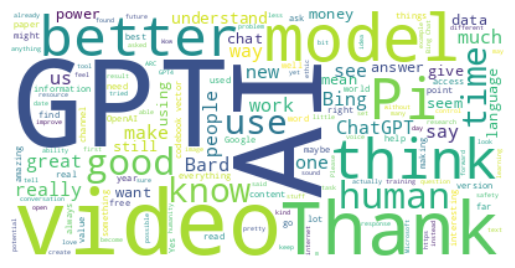

In [30]:
# Positive sentiment most common words

pos_text = " ".join(text for text in pos_df['text'])
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(pos_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Positive sentiment with chatGPT come from comments mentioning ```bing```, ```bill```, ```model``` and ```power```.

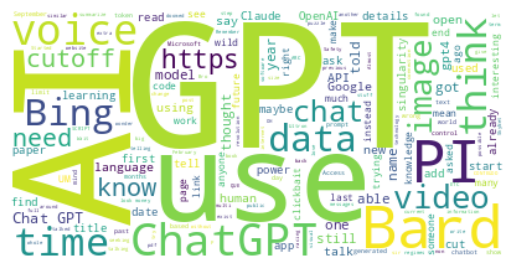

In [31]:
# Neutral sentiment most common words

neu_text = " ".join(text for text in neu_df['text'])
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(neu_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show() 

Neutral sentiment with chatGPT come from comments that have ```data```, ```learning```, ```cutoff``` and ```date``` in it. Surprising that ```clickbait``` is not classified as negative sentiment.

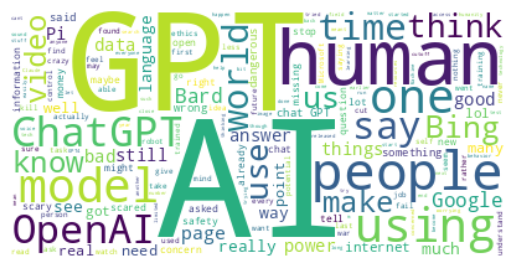

In [32]:
# Negative sentiment most common words

neg_text = " ".join(text for text in neg_df['text'])
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(neg_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show() 

Negative sentiment with chatGPT come from comments mentioning ```page```, ```think``` and ```Microsoft```. Interest that ```Microsoft``` as seen as negative even though its product ```bing``` was classified as positive.

After taking out some nouns and verbs from the word list, the segregation between pos, neutral and neg sentiments were clearer.

## Word clouds of unigrams is very loosely linked to sentiment. It is better to do a phrase cloud. So let's explore multi-gram (bi- and tri-) gram frequencies.

In [33]:
# Testing out rough multi-gram approach on positive sentiment df first.
test2 = pos_df.copy()

word_vectorizer = CountVectorizer(ngram_range=(1,3), analyzer='word', stop_words = list(stopwords))
sparse_matrix = word_vectorizer.fit_transform(test2['text'])
frequencies = sparse_matrix.sum(axis=0).T
df_test = pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names_out(), columns=['frequency'])
df_test['n_grams'] = df_test.index
df_test.reset_index(drop=True, inplace=True)
df_test = df_test[['n_grams', 'frequency']]
df_test.sort_values(by='frequency', ascending=False)

/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:409: UserWarning:

Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['2adksywb6ly', 'aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn', 'xrnokbkcue0'] not in stop_words.



,n_grams,frequency
1032,ai,156
9211,gpt,146
22675,video,91
2751,better,70
15516,pi,65
...,...,...
8441,freudian slip closing,1
8438,french spanish widely,1
8437,french spanish,1
8436,french,1


In [34]:
#Focusing on top 20 first
sample = df_test.sort_values(by='frequency', ascending=False).head(20)
sample

,n_grams,frequency
1032,ai,156
9211,gpt,146
22675,video,91
2751,better,70
15516,pi,65
21005,think,61
2955,bing,60
13597,model,58
9027,good,57
9540,great,55


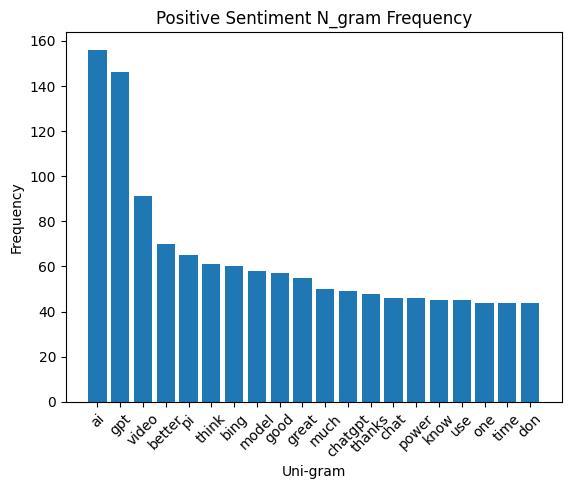

In [35]:
plt.bar(sample['n_grams'], sample['frequency'])
plt.xlabel('Uni-gram')
plt.ylabel('Frequency')
plt.title('Positive Sentiment N_gram Frequency')
plt.xticks(rotation=45)
plt.show()

In [36]:
# trying to get multiple-gram strings starting with bigram. need to take out non-helpful words such as youtube watch, amp and html tags
multi_grams = df_test.query('n_grams.str.count(" ") == [1]')
multi_grams.sort_values(by='frequency', ascending=False)[:20]

,n_grams,frequency
4232,codebook vectors,21
2971,bing chat,15
16014,power seeking,13
9598,great video,12
167,16 2023,10
18084,safety page,10
692,accessed 16,9
13979,much better,8
14818,open ai,8
18258,says gpt,7


This is close, but still really rough because a bunch of stop words and html tags are stuck in the word corpus creating much noise and less good signal.

# Using Susan's uni-/bi-/trigram visualizations
Reference: https://towardsdatascience.com/a-complete-exploratory-data-analysis-and-visualization-for-text-data-29fb1b96fb6a

In [37]:
stop_words = text.ENGLISH_STOP_WORDS.union(["www", "youtube", "br", "href", "https", "39", "com", "2adksywb6ly", "re", "amp", "youtu", "eadaqil_ak0", "45", "5m45s", "quot", "xrnokbkcue0", "12", "13"]) 

In [38]:
# Unigram

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = list(stop_words)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(pos_df['text'], 20)
# for word, freq in common_words:
#     print(word, freq)
df2 = pd.DataFrame(common_words, columns = ['CommentsText' , 'count'])
df2.groupby('CommentsText').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 words in positive comments review after removing stop words')

In [39]:
# Bigram

def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words = list(stop_words)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(pos_df['text'], 20)
for word, freq in common_words:
    print(word, freq)
df2 = pd.DataFrame(common_words, columns = ['CommentsText' , 'count'])
df2.groupby('CommentsText').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 two-word phrases in positive sentiment comments after removing stop words')

codebook vectors 21
bing chat 15
power seeking 13
great video 12
sounds like 12
safety page 10
16 2023 10
accessed 16 9
open ai 8
want know 7
says gpt 7
bard better 7
ai chat 6
chat gpt 6
just like 6
september 2021 6
language models 6
artificial intelligence 6
2023 gpt 6
don think 6


In [40]:
# Tri-grams

def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words=list(stop_words)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_trigram(pos_df['text'], 20)
for word, freq in common_words:
    print(word, freq)
df2 = pd.DataFrame(common_words, columns = ['CommentsText' , 'count'])
df2.groupby('CommentsText').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 three-word phrases in positive sentiment comments after removing stop words') 

accessed 16 2023 9
16 2023 gpt 6
14 crazy details 4
crazy details missed 3
30 prefer gpt3 3
gpt breakdown 14 3
breakdown 14 crazy 3
example says gpt 3
previous models gpt 3
power seeking instrumentally 3
seeking instrumentally useful 3
discrete set values 3
test self improvement 2
doesn mean 30 2
prepare budget export 2
gpt4 bing context 2
context length doubled 2
keeping training secret 2
training secret cherry 2
output better language 2


Tri-grams helped build context, but also had redundant phrases with the same meaning (```yeah english phrases``` and ```english yeah english```) or contradictory phrases (```trained english yeah``` and ```english doesn actually```). However, discounting these may not be good because at sentence level, phrases may actually be distinct. 

# Positive, Neutral and Negative Sentiments at Uni/Bi and Trigram level

In [41]:
# Unigram

def get_top_n_words(corpus, n=None):
        vec = CountVectorizer(stop_words = list(stop_words)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:n]

print('Unigrams. From top to bottom: positive, neutral and negative sentiments')    
sent_dfs = [pos_df, neu_df, neg_df]
for i in sent_dfs:
    
    common_words = get_top_n_words(i['text'], 20)
    # for word, freq in common_words:
    #     print(word, freq)
    df2 = pd.DataFrame(common_words, columns = ['CommentsText' , 'count'])
    df2.groupby('CommentsText').sum()['count'].sort_values(ascending=False).iplot(kind='bar', yTitle='Count', linecolor='black', title='Top 20 words in comments review after removing stop words')

Unigrams. From top to bottom: positive, neutral and negative sentiments


In [42]:
# Bigram

def get_top_n_bigram(corpus, n=None):
        vec = CountVectorizer(ngram_range = (2,2), stop_words = list(stop_words)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:n]

print('Bigrams. From top to bottom: positive, neutral and negative sentiments')    
print (' ')
for i in sent_dfs:
    
    common_words = get_top_n_bigram(i['text'], 20)
    for word, freq in common_words:
        print(word, freq)
    df2 = pd.DataFrame(common_words, columns = ['CommentsText' , 'count'])
    df2.groupby('CommentsText').sum()['count'].sort_values(ascending=False).iplot(kind='bar', yTitle='Count', linecolor='black', title='Top 20 two-word phrases in comments review after removing stop words')

Bigrams. From top to bottom: positive, neutral and negative sentiments
 
codebook vectors 21
bing chat 15
power seeking 13
great video 12
sounds like 12
safety page 10
16 2023 10
accessed 16 9
open ai 8
want know 7
says gpt 7
bard better 7
ai chat 6
chat gpt 6
just like 6
september 2021 6
language models 6
artificial intelligence 6
2023 gpt 6
don think 6


chat gpt 7
gpt told 3
bing chat 3
ai generated 3
extra wild 2
knowledge cutoff 2
openai just 2
asked gpt 2
use gpt 2
chat gpt4 2
did know 2
september 2021 2
15 150 2
intelligent ai 2
world racing 2
ai just 2
sept 2021 2
human control 2
gpt api 2
api bard 2


chat gpt 9
bing ai 4
don think 3
things like 3
technical report 3
404 page 3
30 years 3
using gpt 3
gpt released 3
september 2021 3
right wrong 3
actual human 3
human beings 3
know good 2
feel like 2
people let 2
let hundreds 2
stuff like 2
real concern 2
ai eventually 2


Now it is more interesting since we see clearer distinctions between sentiment categories such as those who have a more positive sentiment towards chatGPT talk about its benefits with budgeting reports and negative sentiment surrounding concerns with ethics and military involvement. Another thing to note is that neutral sentiment phrases have no dominant phrases where distribution of phrases are equal, which is unexpected.

In [43]:
# Trigram

def get_top_n_trigram(corpus, n=None):
        vec = CountVectorizer(ngram_range = (3,3), stop_words = list(stop_words)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:n]

print('Trigrams. From top to bottom: positive, neutral and negative sentiments')    
print (' ')
for i in sent_dfs:
    
    common_words = get_top_n_trigram(i['text'], 20)
    for word, freq in common_words:
        print(word, freq)
    df2 = pd.DataFrame(common_words, columns = ['CommentsText' , 'count'])
    df2.groupby('CommentsText').sum()['count'].sort_values(ascending=False).iplot(kind='bar', yTitle='Count', linecolor='black', title='Top 20 three-word phrases in comments review after removing stop words')

Trigrams. From top to bottom: positive, neutral and negative sentiments
 
accessed 16 2023 9
16 2023 gpt 6
14 crazy details 4
crazy details missed 3
30 prefer gpt3 3
gpt breakdown 14 3
breakdown 14 crazy 3
example says gpt 3
previous models gpt 3
power seeking instrumentally 3
seeking instrumentally useful 3
discrete set values 3
test self improvement 2
doesn mean 30 2
prepare budget export 2
gpt4 bing context 2
context length doubled 2
keeping training secret 2
training secret cherry 2
output better language 2


access pi heypi 2
pi heypi talk 2
new gpt start 1
gpt start learning 1
start learning beginning 1
learning beginning chat 1
beginning chat gpt 1
chat gpt gpt 1
add layers feed 1
layers feed data 1
feed data statistical 1
data statistical learning 1
statistical learning learning 1
learning learning data 1
did study ai 1
study ai school 1
prod bit telling 1
bit telling tell 1
telling tell russia 1
tell russia invaded 1


actual human beings 3
model developed openai 2
scares publicly available 1
publicly available military 1
available military got 1
sorry confussed does 1
confussed does gpt 1
does gpt access 1
gpt access internet 1
access internet getting 1
internet getting different 1
getting different answers 1
different answers tool 1
answers tool acctually 1
tool acctually scraping 1
acctually scraping internet 1
ai unpredictable programers 1
unpredictable programers don 1
programers don know 1
don know good 1


With three-word phrases, the phrases are redundant within each sentiment, but there is more context. Something to note: a whole new topic emerges in positive sentiment about Indian language, Telugu translation. On its own it does not show up often except in context. Would be good to look into how multi-grams are formed.

# 6/15-gram/Sentence-level distribution

In [44]:
stop_words = text.ENGLISH_STOP_WORDS.union(["www", "youtube", "br", "href", "https", "39", "com", "2adksywb6ly", "re", "amp", "youtu", "eadaqil_ak0", "45", "5m45s", "quot", "xrnokbkcue0", "12", "13"]) 

In [45]:
# Seems like tri-gram still will not tell enough. So let's try out longer phrases

# Test on chatGPT data first
# get grams versus sentiment without creating pos, neu, and neg df's

chatgpt_df = df.loc[df['chatbot'] == 'ChatGPT']


pos_chatgpt_df = chatgpt_df.loc[chatgpt_df['sentiment_score'] >= 0.05]
neu_chatgpt_df = chatgpt_df.loc[(chatgpt_df['sentiment_score'] > -0.05) & (chatgpt_df['sentiment_score'] < 0.05)]
neg_chatgpt_df = chatgpt_df.loc[chatgpt_df['sentiment_score'] <= -0.05]

chatgpt_sent_dfs = [pos_chatgpt_df, neu_chatgpt_df, neg_chatgpt_df]

def get_top_n_sixgram(corpus, n=None):
        vec = CountVectorizer(ngram_range = (6,6), stop_words = list(stop_words)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:n]

print('6-grams. From top to bottom: positive, neutral and negative sentiments')    
print (' ')
for i in chatgpt_sent_dfs:
    
    common_words = get_top_n_sixgram(i['text'], 20)
    for word, freq in common_words:
        print(word, freq)
    df3 = pd.DataFrame(common_words, columns = ['CommentsText' , 'count'])
    df3.groupby('CommentsText').sum()['count'].sort_values(ascending=False).iplot(kind='bar', yTitle='Count', linecolor='black', title='Top 20 six-word phrases in comments review after removing stop words')

6-grams. From top to bottom: positive, neutral and negative sentiments
 
arc investigated version program running cloud 2
investigated version program running cloud computing 2
version program running cloud computing service 2
program running cloud computing service small 2
running cloud computing service small money 2
cloud computing service small money account 2
computing service small money account language 2
service small money account language model 2
small money account language model api 2
money account language model api able 2
account language model api able make 2
language model api able make money 2
model api able make money set 2
api able make money set copies 2
able make money set copies increase 2
make money set copies increase robustness 2
arc versions gpt evaluated ineffective autonomous 2
versions gpt evaluated ineffective autonomous replication 2
gpt evaluated ineffective autonomous replication task 2
evaluated ineffective autonomous replication task based 2


new gpt start learning beginning chat 1
gpt start learning beginning chat gpt 1
start learning beginning chat gpt gpt 1
add layers feed data statistical learning 1
layers feed data statistical learning learning 1
feed data statistical learning learning data 1
prod bit telling tell russia invaded 1
bit telling tell russia invaded ukraine 1
telling tell russia invaded ukraine feb 1
tell russia invaded ukraine feb 24 1
russia invaded ukraine feb 24 2022 1
invaded ukraine feb 24 2022 cutoff 1
ukraine feb 24 2022 cutoff date 1
pronounce word interesting inshting caused wild 1
word interesting inshting caused wild minutes 1
interesting inshting caused wild minutes understand 1
roped clickbait end title view instead 1
clickbait end title view instead comment 1
end title view instead comment tool 1
title view instead comment tool using 1


sorry confussed does gpt access internet 1
confussed does gpt access internet getting 1
does gpt access internet getting different 1
gpt access internet getting different answers 1
access internet getting different answers tool 1
internet getting different answers tool acctually 1
getting different answers tool acctually scraping 1
different answers tool acctually scraping internet 1
ai unpredictable programers don know good 1
unpredictable programers don know good thing 1
programers don know good thing bad 1
don know good thing bad thing 1
foreboding 404 missing returned 403 forbidden 1
just getting concerned lol unbelievably limitless 1
getting concerned lol unbelievably limitless technology 1
concerned lol unbelievably limitless technology limited 1
lol unbelievably limitless technology limited far 1
unbelievably limitless technology limited far humans 1
limitless technology limited far humans time 1
technology limited far humans time stop 1


More redundancy in topics across different phrases. Looks like what distinguishes sentiments at least at high level: positive, neutral and negative are going to be at topic level which will be explored later on.

# Sentiment by ChatBot

In [46]:
from plotly.offline import iplot

y0 = df.loc[df['chatbot'] == 'ChatGPT']['sentiment_score']
y1 = df.loc[df['chatbot'] == 'Claude']['sentiment_score']
y2 = df.loc[df['chatbot'] == 'Bard']['sentiment_score']
y3 = df.loc[df['chatbot'] == 'Bing Chat']['sentiment_score']
y4 = df.loc[df['chatbot'] == 'Pi']['sentiment_score']

trace0 = go.Box(
    y=y0,
    name = 'ChatGPT',
    marker = dict(
        color = 'rgb(214, 12, 140)',
    )
)
trace1 = go.Box(
    y=y1,
    name = 'Claude',
    marker = dict(
        color = 'rgb(0, 128, 128)',
    )
)
trace2 = go.Box(
    y=y2,
    name = 'Bard',
    marker = dict(
        color = 'rgb(10, 140, 208)',
    )
)
trace3 = go.Box(
    y=y3,
    name = 'Bing Chat',
    marker = dict(
        color = 'rgb(12, 102, 14)',
    )
)
trace4 = go.Box(
    y=y4,
    name = 'Pi',
    marker = dict(
        color = 'rgb(10, 0, 100)',
    )
)

data = [trace0, trace1, trace2, trace3, trace4]
layout = go.Layout(
    title = "Sentiment Polarity Boxplot for Each Chat Bot"
)

fig = go.Figure(data=data,layout=layout)

iplot(fig)

In [47]:
df['chatbot'].value_counts()

chatbot
ChatGPT      597
Pi           203
Bard          88
Claude        52
Bing Chat     48
Name: count, dtype: int64

Need to keep in mind that not all chatbots have the same number of comments. So best to normalize these number to get average sentiment per chatbot, but lose granularity in data. Given, looks like chatGPT even with high amount of user feedback, is mostly positive with some definite very negative outliers. Pi has about 30% of ChatGPT user reviews and has similar distribution except its median is lower. Bard and Bing Chat have similar sentiment. And last and most negative distribution is Claude with having a median sentiment score of 0.0 and a quantile distribution that is lower on sentiment scale relative to other chat bots. Seems to less favored, but need to scrap more data to build more confidence in this assessment.

# Distribution of Sentiment Over Time (for ChatGPT)

In [48]:
# Change published_at to date only. Aggregate the data.
chatgpt_df['published_at'] = pd.to_datetime(chatgpt_df['published_at'], format='%Y-%m-%dT%H:%M:%SZ')
chatgpt_df['published_at_date'] = chatgpt_df['published_at'].dt.date
chatgpt_df2 = chatgpt_df[['published_at_date', 'sentiment_score']]
chatgpt_df2.groupby(chatgpt_df2['published_at_date'], as_index=False).mean()

,published_at_date,sentiment_score
0,2023-03-14,0.279670
1,2023-03-15,0.265737
2,2023-03-16,0.150853
3,2023-03-17,0.173944
4,2023-03-18,0.304877
5,2023-03-19,0.189783
6,2023-03-20,0.140161
7,2023-03-21,0.014238
8,2023-03-22,0.237400
9,2023-03-23,0.498571


In [49]:
chatgpt_df['published_at_date'].min(), chatgpt_df['published_at_date'].max()

(datetime.date(2023, 3, 14), datetime.date(2023, 7, 15))

In [50]:
chatgpt_df3 = chatgpt_df2.groupby(chatgpt_df2['published_at_date'], as_index=False).mean()
chatgpt_df3

,published_at_date,sentiment_score
0,2023-03-14,0.279670
1,2023-03-15,0.265737
2,2023-03-16,0.150853
3,2023-03-17,0.173944
4,2023-03-18,0.304877
5,2023-03-19,0.189783
6,2023-03-20,0.140161
7,2023-03-21,0.014238
8,2023-03-22,0.237400
9,2023-03-23,0.498571


In [51]:
len(chatgpt_df2), len(chatgpt_df3)

(597, 32)

In [52]:
# Graph the data at non-aggregate level

fig = px.line(chatgpt_df, x="published_at", y=chatgpt_df['sentiment_score'],
              hover_data={"published_at": "|%B %d, %Y"},
              title='ChatGPT Sentiment Over Time')
fig.update_xaxes(
    dtick="M1",
    tickformat="%b\n%Y")
fig.show()

In [53]:
# Graph the data at aggregate level

fig = px.line(chatgpt_df3, x="published_at_date", y=chatgpt_df3['sentiment_score'],
              hover_data={"published_at_date": "|%B %d, %Y"},
              title='ChatGPT Sentiment Over Time (Date)')
fig.update_xaxes(
    dtick="M1",
    tickformat="%b\n%Y")
fig.show()

In [54]:
chatgpt_df.sort_values(by='published_at', ascending=True)[0:10]

,author,published_at,like_count,text,chatbot,sentiment_score,scraped,published_at_date
596,@savlecz1187,2023-03-14 21:18:00,19,The livestream that just ended was amazing as well. Can't wait to actually get my hands on all these new features,ChatGPT,0.7096,YouTube,2023-03-14
595,@Powolny,2023-03-14 21:18:05,1,First!,ChatGPT,0.0000,YouTube,2023-03-14
594,@jeffwads,2023-03-14 21:18:12,8,Fun times and scary times.,ChatGPT,0.0258,YouTube,2023-03-14
593,@DrHanes,2023-03-14 21:18:38,2,Yeehaaa thanks for the Infos!,ChatGPT,0.4926,YouTube,2023-03-14
592,@michaelharvey1701,2023-03-14 21:19:12,1,1st,ChatGPT,0.0000,YouTube,2023-03-14
591,@RakibHasan-um5xi,2023-03-14 21:20:06,1,❤❤,ChatGPT,0.0000,YouTube,2023-03-14
590,@andersonsystem2,2023-03-14 21:21:14,0,I been trying it out GPT4 using the Poe app and Claude plus. They are both very good models. Good video 🎉,ChatGPT,0.7474,YouTube,2023-03-14
589,@RainbowSixIntel,2023-03-14 21:21:37,2,"Just watched the video by open ai, great timing!",ChatGPT,0.6588,YouTube,2023-03-14
588,@MrDarthlizard32,2023-03-14 21:23:50,9,You're a true hero.,ChatGPT,0.7506,YouTube,2023-03-14
587,@DBREW,2023-03-14 21:28:05,3,Anyone have a link to the technical paper?,ChatGPT,0.0000,YouTube,2023-03-14


When looking at non-aggregated data, looks like there was huge variance in sentiment when YouTube video on chatGPT first came out in March 2023. After aggregating, can see at date level, the overall sentiment in March being positive with a clear dip on March 27th. Then user response tapered off with majority of sentiment being positive with some clear dips On April 4th and July 15th. This sort of data can be used when monitoring product feature releases :).

# Histogram of sentiment over time split by chatbot

In [55]:
# get date from published_at
# get pivoted data with video having its own column
# average sentiment score value aggregated by date

test = df
test['published_at'] = pd.to_datetime(test['published_at'], format='%Y-%m-%dT%H:%M:%SZ')
test['published_at_date'] = test['published_at'].dt.date
test.head(1)

,author,published_at,like_count,text,chatbot,sentiment_score,scraped,published_at_date
0,@ozramblue117,2023-07-15 06:52:27,0,"What scares me is that if this is what’s publicly available, what have the military got and where’s it at now? 😅",ChatGPT,-0.34,YouTube,2023-07-15


In [56]:
test2 = test.copy()
test2['chatbot'].value_counts().index

Index(['ChatGPT', 'Pi', 'Bard', 'Claude', 'Bing Chat'], dtype='object', name='chatbot')

In [57]:
for c in test2['chatbot'].value_counts().index:

    test2[c]=(np.select([test2['chatbot'].eq(c)],
                        [test2['sentiment_score']        
                        ])) 
test3 = test2[['published_at_date', 'ChatGPT', 'Pi', 'Bard', 'Claude', 'Bing Chat']]
test3.head(2)

,published_at_date,ChatGPT,Pi,Bard,Claude,Bing Chat
0,2023-07-15,-0.3400,0.0,0.0,0.0,0.0
1,2023-06-25,-0.0772,0.0,0.0,0.0,0.0


In [58]:
test3['published_at_date'].min(), test3['published_at_date'].max()

(datetime.date(2023, 3, 14), datetime.date(2023, 11, 28))

In [59]:
# Mean aggregate of sentiment scores by date for each chatbot column
test4 = test3.groupby(test3['published_at_date'], as_index=False).mean()
test4

,published_at_date,ChatGPT,Pi,Bard,Claude,Bing Chat
0,2023-03-14,0.279670,0.00000,0.00000,0.0,0.0
1,2023-03-15,0.265737,0.00000,0.00000,0.0,0.0
2,2023-03-16,0.150853,0.00000,0.00000,0.0,0.0
3,2023-03-17,0.173944,0.00000,0.00000,0.0,0.0
4,2023-03-18,0.304877,0.00000,0.00000,0.0,0.0
...,...,...,...,...,...,...
129,2023-11-07,0.000000,0.00000,0.00000,0.0,0.0
130,2023-11-21,0.000000,-0.05135,-0.27915,0.0,0.0
131,2023-11-24,0.000000,-0.45180,0.00000,0.0,0.0
132,2023-11-26,0.000000,-0.72420,0.00000,0.0,0.0


In [60]:
# Seeing if aggregation did indeed condense df
len(test3), len(test4)

(988, 134)

In [61]:
fig = px.line(test4, x="published_at_date", y=test4.columns,
              hover_data={"published_at_date": "|%B %d, %Y"},
              title="Chatbots' Sentiment Over Time")
fig.update_xaxes(
    dtick="M1",
    tickformat="%b\n%Y")
fig.show()

# 2D Density Jointplot of Sentiment vs. Month in 2023

# Sentiment by Likes by Chatbot

# Distribution of Sentiment by Comment Length

# Treemap of Comment Length Per Sentiment Split by Chatbot

# Bigram/Trigrams Percentage Per ChatBot

# Bigram/Trigram Comparisons between chatGPT and Claude

# Bigram Similarities and Frequencies with Sentiment Heat bar

# Domain specific words/Technical jargon associated with each sentiment

# Topic Modeling

More viz may be added based on app being scraped and sort of data they provide on users' response

_____

# Conclusion on Online Sentiment of Chatbots Big and Not-So-Big Players in 2023